a) Bringen Sie die quadratische Funktion
$f(x, y) = x^2 + \frac{1}{2} y^2 + \frac{1}{4}xy − x + 4$

b) Wie lautet die Hessematrix von f?

$f(x, y) = x^2 + \frac{1}{2} y^2 + \frac{1}{4}xy − x + 4$

$grad(f)(x,y)= \begin{bmatrix} \frac{\partial f}{\partial x}(x,y) \\ \frac{\partial f}{\partial y})x,y) \end{bmatrix} = 
\begin{bmatrix} 2x + \frac{1}{4}y -1 \\ y + \frac{1}{4}x \end{bmatrix}$

$H = \begin{bmatrix} \frac{\partial f}{\partial x \partial x}(x,y)  & \frac{\partial f}{\partial y \partial x}(x,y) \\
\frac{\partial f}{\partial x \partial y}(x,y) & \frac{\partial f}{\partial y \partial y}(x,y)
\end{bmatrix}
=
\begin{bmatrix} 2 & \frac{1}{4} \\
\frac{1}{4} & 1 \end{bmatrix}
$

c) Berechnen Sie die Eigenwerte der Hessematrix (manuell, Python, WolframAlpha,...).

In [1]:
import numpy as np

H = np.array([[2, 1/4], [1/4, 1]])
eigenvalues = np.linalg.eigvals(H)

print("Eigenwerte:", eigenvalues)

Eigenwerte: [2.05901699 0.94098301]


d) Berechnen Sie die Hauptminoren Δ1 und Δ2 der Hessematrix.

Hauptminor eins ist einfach die Determinante der ersten mögliche Untermatrix die nur den Wert 2 enthält:

$\Delta1 = det(2) = 2$

Hauptminor $\Delta2$ ist dagegen die Determinante der zweiten Untermatrix, die in einer 2x2 matrix einfach der gesamten matrix entspricht, $\Delta2$ ist also die Determinante der Hessematrix:
$\Delta2 = det \begin{bmatrix} 2 & \frac{1}{4} \\
\frac{1}{4} & 1 \end{bmatrix}  = 2 \cdot 1 - \frac{1}{4} \cdot \frac{1}{4} = 1$

e) Ist die Funktion konvex oder gar strikt konvex? Begründung.

$f$ ist konvex wenn H semipositiv definit ist und strikt konvex wenn H überall positiv definit ist

Definitheit wird durch das VOrzeichen der Hauptminoren bestimmt, welche hier beide positiv sind.

--> $f$ ist also strikt konvex

f) Berechnen Sie die kritischen Punkte der Funktion. Lösen sie das auftretende Lineare
Gleichungssystem (LGS) nach Belieben manuell, mit Python, WolframAlpha...

In [2]:
from sympy import symbols, diff, solve

x, y = symbols('x y')
f = x**2 + 1/2 * y**2 + 1/4 * x * y - x + 4

df_dx = diff(f, x)
df_dy = diff(f, y)

critical_points = solve([df_dx, df_dy], [x, y])
print("Kritische Punkte:", critical_points)

Kritische Punkte: {x: 0.516129032258065, y: -0.129032258064516}


Gegeben sei die Rosenbrockfunktion $f(x, y) = 100(y − x^2)^2 + (1 − x)^2$ 

a) Implementieren Sie eine Funktion, die f ¨ ur f an einer beliebigen Stelle (x, y) den
Funktionswert zur¨uck gibt.

In [3]:
def rosenbrock(x, y):
    return 100 * (y - x**2)**2 + (1 - x)**2
x = 5
y = 10
print(rosenbrock(x,y))

22516


b) Plotten Sie den Funktionsgraphen in einer Umgebung von $(0, 0)^T$

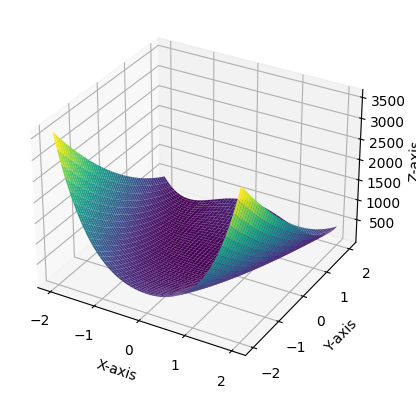

In [4]:
import matplotlib.pyplot as plt
def plot_rosenbrock():
    x = np.linspace(-2, 2, 400)
    y = np.linspace(-2, 2, 400)
    X, Y = np.meshgrid(x, y)
    Z = rosenbrock(X, Y)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')

    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    plt.show()
plot_rosenbrock()

c) Implementieren Sie zwei Funktionen, die fuer f an einer beliebigen Stelle die partielle
Ableitung nach x bzw. y zur¨uck gibt.

In [5]:
from sympy import symbols, diff
def partial_derivative_x(x_value, y_value):
    x, y = symbols('x y')
    f = 100 * (y - x**2)**2 + (1 - x)**2
    df_dx = diff(f, x)
    df_dx_value = df_dx.subs({x:x_value, y:y_value})
    return df_dx_value

def partial_derivative_y(x_value, y_value):
    x, y = symbols('x y')
    f = 100 * (y - x**2)**2 + (1 - x)**2
    df_dy = diff(f, y)
    point = {x:x_value, y:y_value}
    df_dy_value = df_dy.subs(point)
    return df_dy_value
x = 5
y = 10
print(partial_derivative_x(x,y))
print(partial_derivative_y(x,y))

30008
-3000


Implementieren Sie eine Funktion, die unter Verwendung der obigen Teilaufgabe die
Richtungsableitung von f in Richtung ⃗p = (1, 1)T an einer beliebigen Stelle zur¨uck gibt.
Berechnen Sie mit der Funktion die Richtungsableitung von f in Richtung ⃗p = (1, 1)T an der
Stelle (2, 1).

In [6]:
def directional_derivative(x, y, p):
    partial_x = partial_derivative_x(x, y)
    partial_y = partial_derivative_y(x, y)
    direction_derivative = p[0] * partial_x + p[1] * partial_y
    return direction_derivative


result = directional_derivative(2, 1, (1, 1))
print(f'Directional derivative at (2, 1) in direction (1, 1): {result}')

Directional derivative at (2, 1) in direction (1, 1): 1802


Approximieren Sie die Richtungsableitung von f in Richtung ⃗p = (1, 1)T an der Stelle
(2, 1)T numerisch. Verwenden Sie hierf ¨ ur die Tatsache, dass nach Definition der
Richtungsableitung f ¨ ur ausreichend kleine ε > 0 gilt:
∂⃗pf(⃗x0) ≈
f(⃗x0 + ε⃗p) − f(⃗x0)
ε

In [7]:
def directional_derivative_approx(x, y, p, epsilon=0.0001):
    f_at_x = rosenbrock(x, y)
    f_at_x_plus_epsilon = rosenbrock(x + epsilon * p[0], y + epsilon * p[1])
    numerical_derivative = (f_at_x_plus_epsilon - f_at_x) / epsilon
    return numerical_derivative

print(directional_derivative_approx(2, 1, (1, 1)))

1802.1501060070477


a) Berechnen Sie den Gradienten der Kostenfunktion ∇E(⃗x).

dafür  wird zuerst die partielle Ableitung für jedes xj berechnet:

$\frac{\partial E}{\partial x_j} = (x_j - y_j) + \delta(x_{j-1} - 2x_j + x_{j+1})$